In [60]:
import pandas as pd

dataset = pd.read_csv('heart disease.csv')
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [62]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [63]:
# Since our dataset already has no categorical values we don't require any data preprocessing

<Figure size 1200x600 with 0 Axes>

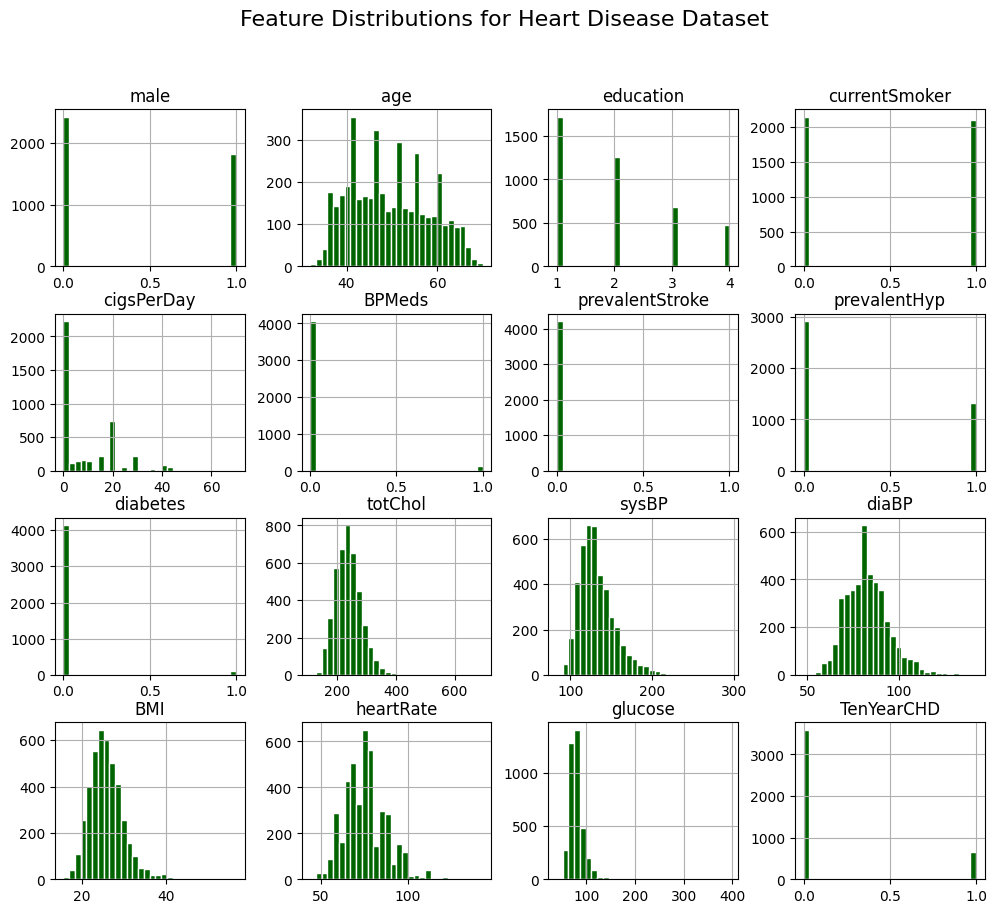

In [64]:
plt.figure(figsize=(12, 6))
dataset.hist(bins=30, figsize=(12, 10), color='darkgreen', edgecolor='white')
plt.suptitle("Feature Distributions for Heart Disease Dataset", fontsize=16)
plt.show()

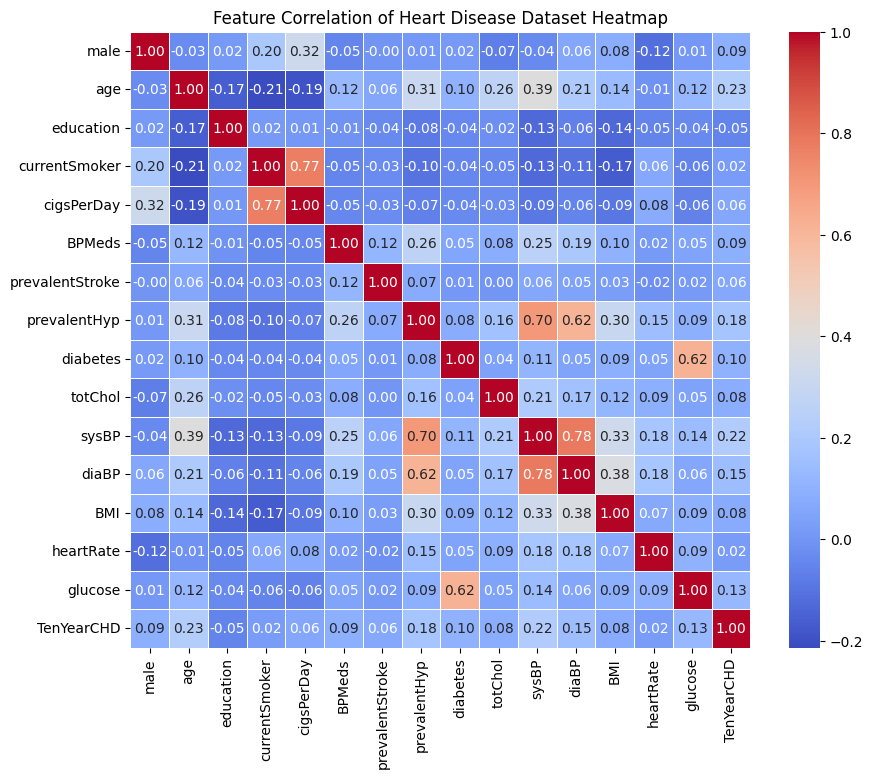

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation of Heart Disease Dataset Heatmap")
plt.show()

In [66]:
# this function allows us to drop the missing values
dataset.dropna(inplace=True)

In [67]:
X = dataset.drop(columns=["TenYearCHD"])
y = dataset["TenYearCHD"]  # Target variable

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [72]:
print("Accuracy of the model:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model: 0.860655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       620
           1       0.73      0.14      0.24       112

    accuracy                           0.86       732
   macro avg       0.80      0.57      0.58       732
weighted avg       0.84      0.86      0.82       732



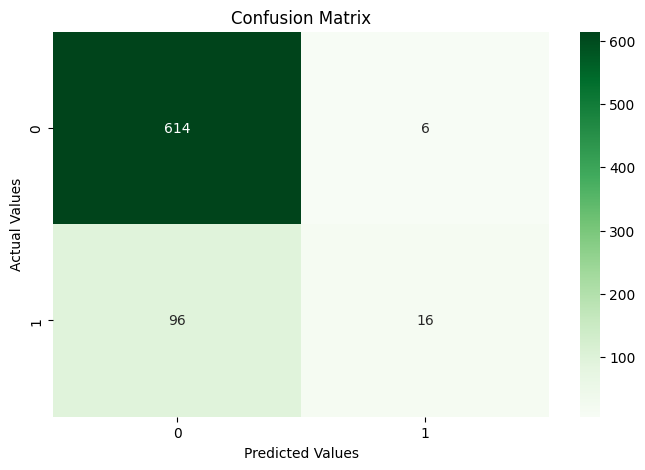

In [73]:
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

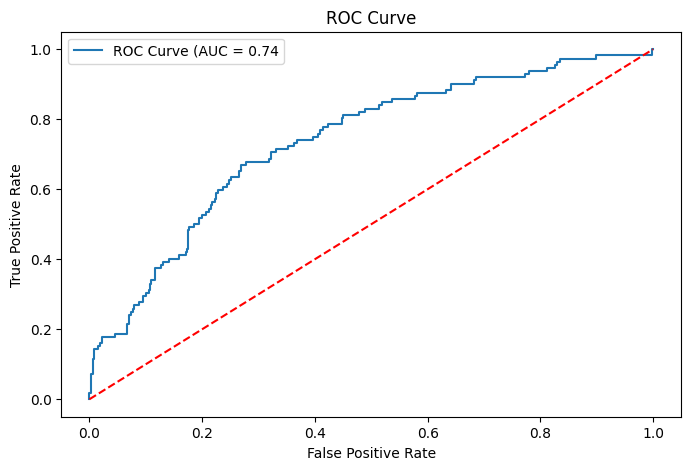

In [74]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [75]:
# this ROC curves shows that our model is averagely effectice in predicting the target variable.  